# <b>Econometrics</b>

In [1]:
import statsmodels.api as sm
import wooldridge as woo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Simple Regression

Model

$y = \beta_0+\beta_1x+u$

$\hat{\beta_0} = \bar{y}-\hat{\beta_1}\bar{x}$

$\hat{\beta_1} = \dfrac{\mathrm{Cov(x,y)}}{\mathrm{Var(x)}}$

$\hat{y} = \hat{\beta_0}+\hat{\beta_1}x$

$\text{salary} = \beta_0+\beta_1\cdot\text{roe}+u$

In [2]:
data = woo.dataWoo('ceosal1')
x = data['roe']
y = data['salary']

#OLS
cov_xy = np.cov(x,y)[1,0]
var_x = np.var(x, ddof = 1)
x_bar = np.mean(x)
y_bar = np.mean(y)


b1 = cov_xy/var_x
b0 = y_bar-b1*x_bar
print(f"b1: {b1:.2f}")
print(f"b0: {b0:.2f}")

b1: 18.50
b0: 963.19


In [3]:
def linear_regression(x, y):
    "Returns the estimated parameters of the simple linear regression models."
    cov_xy = np.cov(x, y)[0, 1]
    var_x = np.var(x, ddof = 1)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = cov_xy/var_x
    b0 = y_bar-b1*x_bar
    return f'Intercept: {b0:.2f}, Slope: {b1:.2f}'

In [4]:
linear_regression(x = data['roe'], y = data['salary'])

'Intercept: 963.19, Slope: 18.50'

In [5]:
import statsmodels.formula.api as smf

In [6]:
regression = smf.ols(formula = 'salary~roe', data = data)
results = regression.fit()

In [7]:
results.params

Intercept    963.191336
roe           18.501186
dtype: float64

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Mon, 29 Mar 2021   Prob (F-statistic):             0.0978
Time:                        22:19:23   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

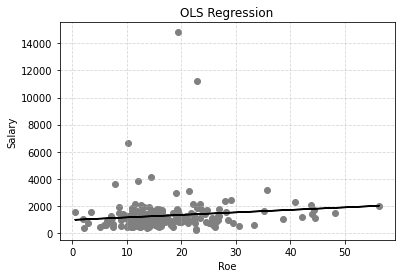

In [9]:
plt.title('OLS Regression')
plt.scatter('roe', 'salary', data = data, color = 'gray')
plt.plot(data['roe'], results.fittedvalues, color = 'black')
plt.grid(linestyle = '--', alpha = 0.5)
plt.xlabel('Roe')
plt.ylabel('Salary')
plt.show()

In [10]:
def linear_regression(formula, data):
    regression = smf.ols(formula = formula, data = data).fit()
    return regression

In [11]:
#linear_regression(formula = 'salary~roe', data = data)

### Voting outcomes and campaign expenditures

$\text{voteA} = \beta_0+\beta_1\cdot\text{shareA}+u$

$\widehat{\text{voteA}} = 26.81+0.464\cdot\text{shareA}$

In [12]:
vote_data = woo.dataWoo('vote1')
results = linear_regression(formula = 'voteA ~ shareA', data = vote_data)
params = results.params

In [13]:
type(params)

pandas.core.series.Series

In [14]:
params

Intercept    26.812214
shareA        0.463827
dtype: float64

In [15]:
params['shareA']  #slope

0.4638269122908854

In [16]:
params[0]  #intercept

26.812214128680406

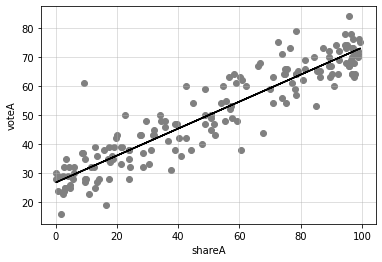

In [17]:
plt.scatter('shareA', 'voteA', data = vote_data, color = 'gray')
plt.plot(vote_data['shareA'], results.fittedvalues, color = 'black')
plt.ylabel('voteA')
plt.xlabel('shareA')
plt.grid(alpha = 0.5)
plt.show()

### Coeficients, fitted values and residuals

Predicted values:

$\hat{y}_i = \hat{\beta}_0+\hat{\beta}_1\cdot x_i$

Residuals for each observation: $i = 1, \dots , n$

$\hat{u}_i = y_i - \hat{y}_i$

Properties of OLS statistics:

$\sum_{i = 1}^{n} \hat{u}_i = 0  \Rightarrow \overline{\hat{u}}_i = 0  \text{   (1)}$

$\sum_{i = 1}^{n} x_i \hat{u}_i = 0 \Rightarrow \mathrm{Cov(x_i, \hat{u}_i)} = 0 \text{   (2)}$  

$\bar{y} = \hat{\beta}_0+\hat{\beta}_1 \cdot \bar{x} \text{   (3)}$

In [18]:
results = linear_regression(formula = 'salary ~ roe', data = data)
b = results.params  #params
#predicted values
#salary_hat = b[0]+b[1]*data['roe']
salary_hat = results.fittedvalues
#residuals
u_hat = results.resid

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Mon, 29 Mar 2021   Prob (F-statistic):             0.0978
Time:                        22:19:24   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
u_hat_mean = u_hat.mean()

In [21]:
u_hat_mean

-7.83296872340321e-14

In [22]:
cov_roe_u = np.cov(data['roe'], u_hat)[1, 0]

In [23]:
salary_mean = data['salary'].mean()
salary_mean

1281.1196172248804

In [24]:
round(salary_mean, 2) == round(b[0]+b[1]*data['roe'].mean(), 2)

True

In [25]:
values = {
    'roe': data['roe'],
    'salary': data['salary'],
    'salary_hat': salary_hat,
    'u_hat': u_hat
}
data_estimated = pd.DataFrame(values)
data_estimated.head()

,roe,salary,salary_hat,u_hat
0,14.1,1095,1224.058071,-129.058071
1,10.9,1001,1164.854261,-163.854261
2,23.5,1122,1397.969216,-275.969216
3,5.9,578,1072.348338,-494.348338
4,13.8,1368,1218.507712,149.492288


In [26]:
#all(results.fittedvalues == salary_hat)
#all(results.resid == u_hat)

In [27]:
#R²

In [28]:
R2_a = np.var(salary_hat, ddof = 1)/np.var(data['salary'])
R2_b = 1-np.var(u_hat)/np.var(data['salary'])
R2_c = np.corrcoef(data['salary'], salary_hat)[1, 0]**2

### Wage and education

$\text{wage} = \beta_0+\beta_1\cdot\text{education}+u$

$\widehat{\text{wage}} = -0.90+0.54\cdot\text{education}$

In [29]:
wage_data = woo.dataWoo('wage1')
linear_regression(formula = 'wage ~ educ', data = wage_data).params

Intercept   -0.904852
educ         0.541359
dtype: float64

### Goodness of Fit

$$SST = \sum_{i = 1}^{n}\left(y_i - \bar{y}\right)^2 = \left(n-1\right)\cdot \mathrm{Var(y)}$$

$$SSE  = \sum_{i = 1}^{n}\left(\hat{y_i}-\bar{y}\right)^2 = \left(n-1\right) \cdot \mathrm{Var(\hat{y})} $$

$$SSR =  \sum_{i = 1}^{n}\left(\hat{u}_i-0\right)^2 = \left(n-1\right) \cdot \mathrm{Var(\hat{u})} $$

$$R^{2} = \dfrac{\mathrm{Var(\hat{y})}}{\mathrm{Var(y)}} = 1 - \dfrac{\mathrm{Var(\hat{u})}}{\mathrm{Var(y)}} $$

### Nonlinearities

Example 1:

In [30]:
wage = woo.dataWoo('wage1')

#log-level model
regression = smf.ols(formula = 'np.log(wage)~educ', data = wage).fit()
b = regression.params
b

Intercept    0.583773
educ         0.082744
dtype: float64

The semi-logarithmic specification implies that wages are higher by about 8.3% for individuals with an additional year of education.

Example 2:

In [31]:
ceosal = woo.dataWoo('ceosal1')
regression = smf.ols(formula = 'np.log(salary) ~ np.log(sales)', data = ceosal).fit()
b = regression.params
b

Intercept        4.821996
np.log(sales)    0.256672
dtype: float64

If the sales increase by 1%, the salary of the CEO tends to increase by 0.257%.

### Regression through the origin and Regression with a constant

In [32]:
#model without intercept
#smf.ols('y~0+x', data = sample)

In [33]:
#model with constant only
#smf.ols('y~1', data = sample)

Example:

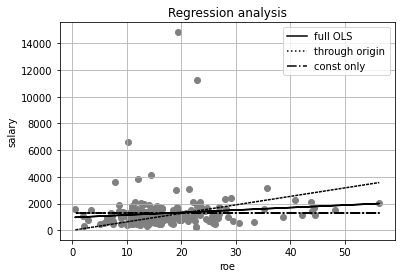

In [34]:
ceosal = woo.dataWoo('ceosal1')

#OLS default
regression1 = smf.ols(formula = 'salary ~ roe', data = ceosal).fit()
b_1 = regression1.params

#regression without intercept
regression2 = smf.ols(formula = 'salary ~ 0+roe',data = ceosal).fit()
b_2 = regression2.params

#regression without slope (on a constant)
regression3 = smf.ols(formula = 'salary ~ 1', data = ceosal).fit()
b_3 = regression3.params

#plot
plt.scatter(x = 'roe', y = 'salary', data = ceosal, color = 'grey',
           label = '')

#plot model 1
plt.plot(ceosal['roe'], regression1.fittedvalues,
         color = 'black', ls = '-', label = 'full OLS')

#plot model 2
plt.plot(ceosal['roe'], regression2.fittedvalues, 
        color = 'black', ls = ':', label = 'through origin')

#plot model 3
plt.plot(ceosal['roe'], regression3.fittedvalues,
         color = 'black', ls = '-.', label = 'const only')

plt.title('Regression analysis')
plt.legend()
plt.ylabel('salary')
plt.xlabel('roe')
plt.grid()
plt.show()


Source: http://www.upfie.net/